In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def plot_two_images(img1: np.array, img2: np.array):
    _, axis = plt.subplots(1, 2, figsize=(12, 10))
    axis[0].imshow(img1, cmap='gray',vmin=0, vmax=255)
    axis[1].imshow(img2, cmap='gray',vmin=0, vmax=255)
    axis[0].title.set_text("Before")
    axis[1].title.set_text("After")
    
def plot_two_images_sample(img1: np.array, img2: np.array):
    _, axis = plt.subplots(1, 2, figsize=(12, 10))
    axis[0].imshow(img1, cmap='gray')
    axis[1].imshow(img2, cmap='gray')
    axis[0].title.set_text("Before")
    axis[1].title.set_text("After")


# Task 1: Implement a function to perform convolution

In [3]:
def conv(img, kernel):

    k = kernel.shape[0]
    h,w = img.shape
    h = h - k + 1
    w = w - k + 1
    conv_img = np.zeros(shape=(h, w))
    
    # Iterate over the rows
    for i in range(h):
        # Iterate over the columns
        for j in range(w):
            # Our value at that specific index
            mat = img[i:i+k, j:j+k]
            
            # Element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            conv_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return conv_img

# Explain your code here:
# The image must be greyscaled first to make it a 1 channel array
# initialize the convolved image array
# iterate over the rows and columns
# Get the current 5x5 matrix
# Multiply it with our kernel and sum it up
# assign the result of the sum into the conv_img array at that index


In [4]:
B = np.array([[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]])
print(B)

[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]]


In [5]:
B = B * 1/159
print(B)

[[0.01257862 0.02515723 0.03144654 0.02515723 0.01257862]
 [0.02515723 0.05660377 0.0754717  0.05660377 0.02515723]
 [0.03144654 0.0754717  0.09433962 0.0754717  0.03144654]
 [0.02515723 0.05660377 0.0754717  0.05660377 0.02515723]
 [0.01257862 0.02515723 0.03144654 0.02515723 0.01257862]]


# Task 1 Result

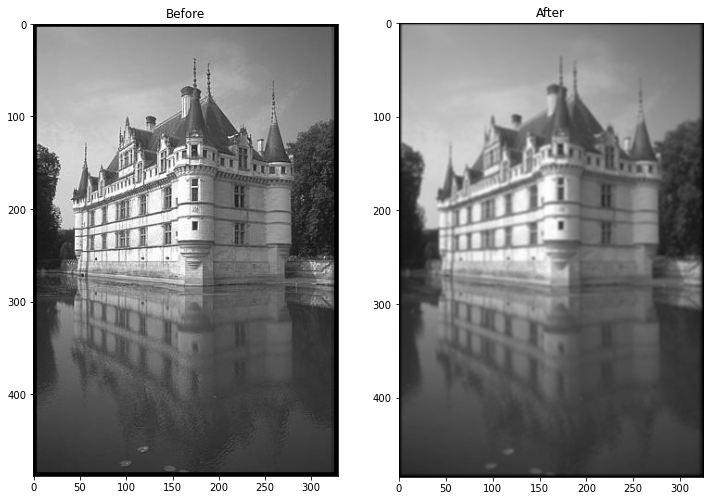

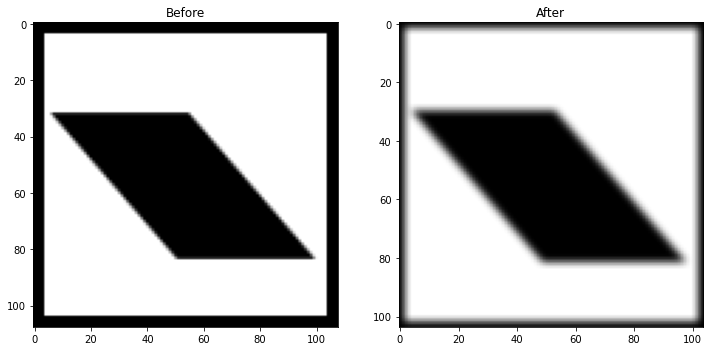

In [6]:
img = cv2.imread('./test05.jpg', 0)
img_sample = cv2.imread('./test02.png', 0)
img = cv2.copyMakeBorder(img,4,4,4,4, cv2.BORDER_CONSTANT, None, value=0) # Padding
img_sample = cv2.copyMakeBorder(img_sample,4,4,4,4, cv2.BORDER_CONSTANT, None, value=0) # Padding
img_blurred = conv(img=np.array(img), kernel=B)
img_sample_blurred = conv(img=np.array(img_sample), kernel = B)
plot_two_images(img, img_blurred)
plot_two_images(img_sample, img_sample_blurred)
# The padding is used to allow the filter more space for it to cover in the image.
# Blurring is used in edge detection to reduce the amount of noise in the images which improves the result of our
# canny edge detection algorithm.

# Task 2: Calculate the image gradients


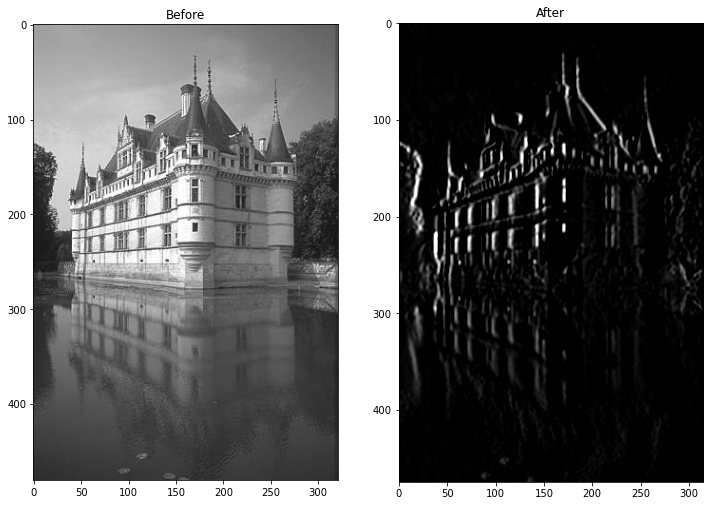

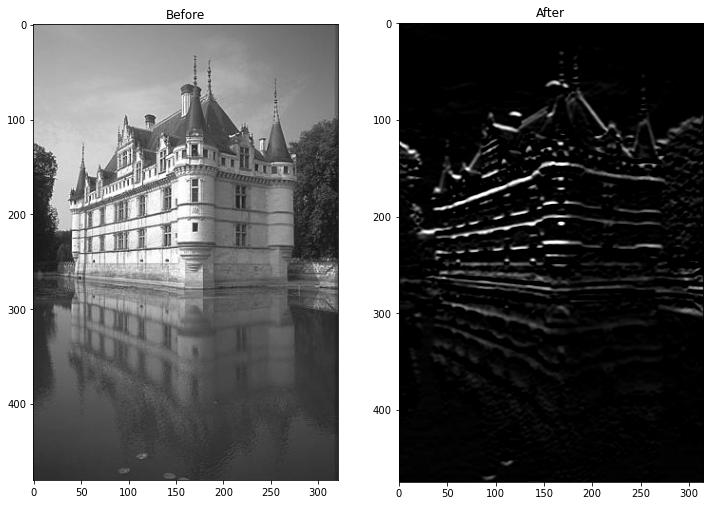

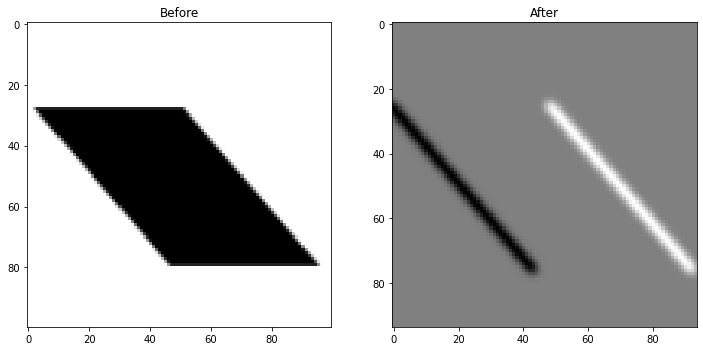

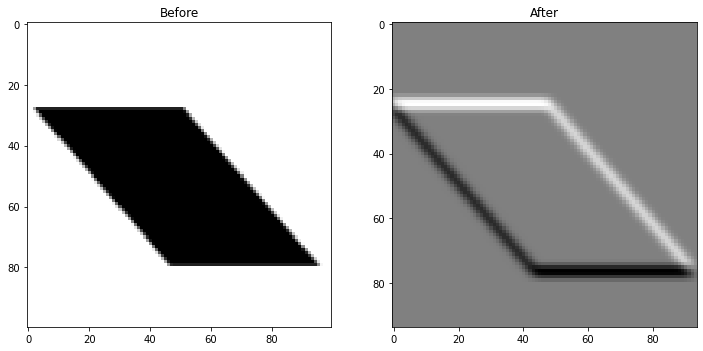

In [7]:
# Load the image
img2 = cv2.imread('./test05.jpg', 0)
img2_sample = cv2.imread('./test02.png', 0) 

# Blur the image
img2_blurred = cv2.copyMakeBorder(img2,4,4,4,4, cv2.BORDER_CONSTANT, None, value=0) # Padding
img2_sample_blurred = cv2.copyMakeBorder(img2_sample,4,4,4,4, cv2.BORDER_CONSTANT, None, value=0) # Padding

img2_blurred = conv(img=np.array(img2), kernel=B)
img2_sample_blurred = conv(img=np.array(img2_sample), kernel=B)

# Sobel Filter
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

sobelX = np.zeros(shape=img2.shape)
sobelY = np.zeros(shape=img2.shape)
sobelX_sample = np.zeros(shape=img2_sample.shape)
sobelY_sample = np.zeros(shape=img2_sample.shape)

sobelX = conv(img2_blurred,sobel_x_kernel)
sobelY = conv(img2_blurred,sobel_y_kernel)

sobelX_sample = conv(img2_sample_blurred,sobel_x_kernel)
sobelY_sample = conv(img2_sample_blurred,sobel_y_kernel)
        
plot_two_images(img2, sobelX) 
plot_two_images(img2, sobelY)
plot_two_images_sample(img2_sample, sobelX_sample) 
plot_two_images_sample(img2_sample, sobelY_sample)
# Demonstrate your understanding by answering the question below:
# Looking at the filter coefficients, explain how a sobel filter picks out horizontal edges?

# It calculates the gradient of an image intensity at each pixel and the sobel_x_kernel sweeps 
# through the image horizontally and finds the largest increase or decrease in intensity
# value. This is why the values in the second column of sobel_x_kernel matrix is all zero, so that it can compare 
# the change in values in the x axis. It basically tries to find the discrete approximation
# to the derivative of each pixel


# Task 3: Calculate gradient magnitude

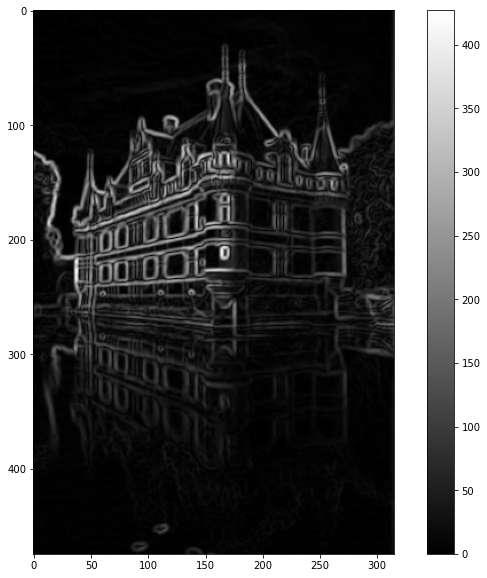

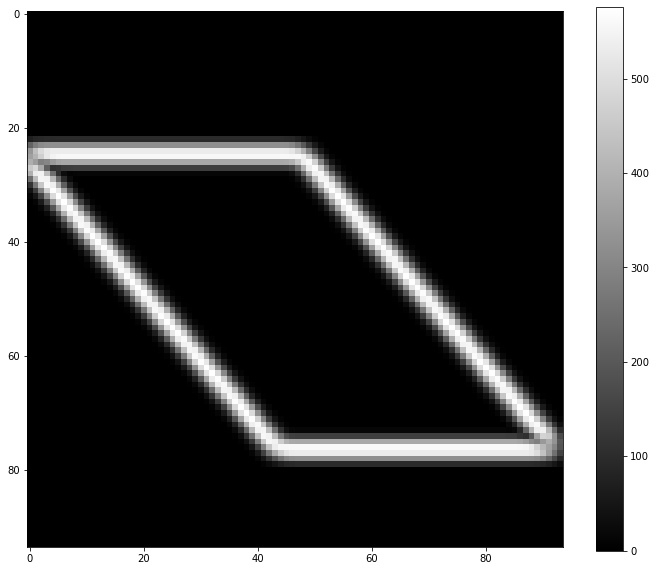

In [8]:
# Show results here

grad_mag = np.zeros(shape=img2.shape)
grad_mag = np.sqrt(np.square(sobelX) + np.square(sobelY))
figure(figsize=(12,10))
plt.imshow(grad_mag, cmap='gray')
plt.colorbar()

grad_mag_sample = np.zeros(shape=img2_sample.shape)
grad_mag_sample = np.sqrt(np.square(sobelX_sample) + np.square(sobelY_sample))
figure(figsize=(12,10))
plt.imshow(grad_mag_sample, cmap='gray')
plt.colorbar()

# Demonstrate your understanding by answering the question below:
# What differences in gradient magnitude would be observed for a corner, edge and solid region?

# Our model measure the change in intensity horizontally for 'gx' and vertically for 'gy'. 
# The gradient magnitude or the eigen values for gx will show a small eigen value for an edge.
# For a corner, it will show a large eigen value in gx and gy since the change in intensity is in both direction
# Lastly, for a solid region the gradient magnitude will be very small regardless of which directions we are measuring
# since there is no significant change in pixel intensity.


# Task 4: Calculate gradient orientation

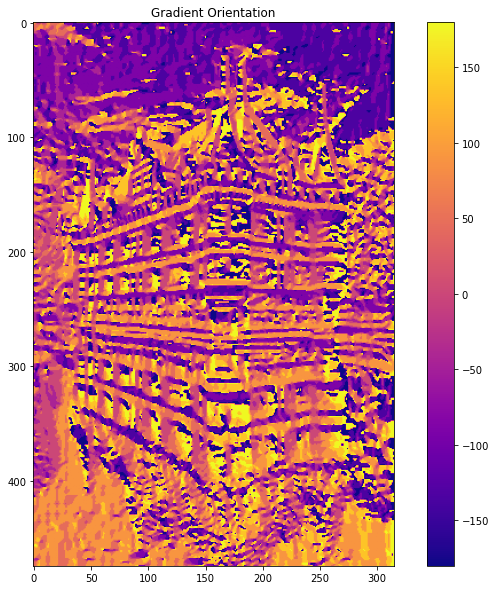

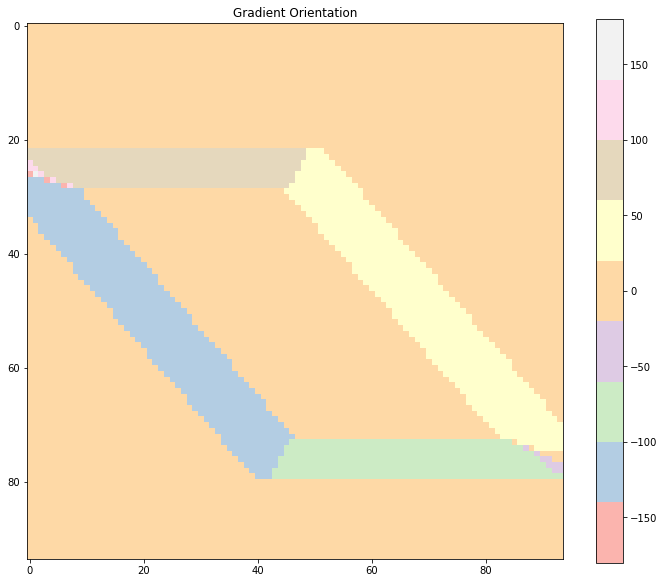

In [9]:
# Show results here
grad_orient = np.arctan2(sobelY,sobelX) * (180/np.pi)
grad_orient = np.round(grad_orient/45) * 45
grad_orient_sample = np.arctan2(sobelY_sample,sobelX_sample) * (180/np.pi)
grad_orient_sample = np.round(grad_orient_sample/45) * 45
# Demonstrate your understanding by answering the question below:
# How could the gradient orientation be used to obtain rotational invariance for patch matching?

# The gradient orientation can help us estimate the points or region that we have determine for our patch matching
# Since we know the alignment of our initial image. Then we can use a gradient orientation histogram matching and
# normalised cross correlation template matching to obtain rotational invariance.

figure(figsize=(12, 10))
plt.imshow(grad_orient, cmap = 'plasma')
plt.title("Gradient Orientation")
plt.colorbar()
figure(figsize=(12, 10))
plt.imshow(grad_orient_sample,cmap='Pastel1')
plt.title("Gradient Orientation")
plt.colorbar()


# Task 5: Extend your code to perform non-maximal suppression

In [10]:
def non_max_suppression(img, direction):
    X, Y = img.shape
    output_image = np.zeros((X,Y), dtype=np.int32)
    angle = direction
    for i in range(1,X-1):
        for j in range(1,Y-1):
            q = 255
            r = 255
            #angle 0 
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = img[i, j+1]
                r = img[i, j-1]
            #angle 45 
            elif (22.5 <= angle[i,j] < 67.5):
                q = img[i+1, j-1]
                r = img[i-1, j+1]
            #angle 90 
            elif (67.5 <= angle[i,j] < 112.5):
                q = img[i+1, j]
                r = img[i-1, j]
            #angle 135 
            elif (112.5 <= angle[i,j] < 157.5):
                q = img[i-1, j-1]
                r = img[i+1, j+1]

            if (img[i,j] >= q) and (img[i,j] >= r):
                output_image[i,j] = img[i,j]
            else:
                output_image[i,j] = 0

    return output_image

# Code Explanation
# Create a matrix of zeros with the same size as our gradient magnitude matrix
# Get the direction of the edges based on the angle matrix
# then check if the next pixel in the same direction has a higher intensity than the one we're currently processing
# then I determine where does the angle lies in and finally I returned the processed image.

def threshold(img, lowRatio, highRatio):
    
    high_threshold = img.max() * highRatio;
    low_threshold = img.min() * lowRatio;
    
    M, N = img.shape
    output_image = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(20)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= high_threshold)
    zeros_i, zeros_j = np.where(img < low_threshold)
    
    weak_i, weak_j = np.where((img <= high_threshold) & (img >= low_threshold))
    
    output_image[strong_i, strong_j] = strong
    output_image[weak_i, weak_j] = weak
    
    return (output_image)

# Demonstrate your understanding by answering the question below:
# Explain how you chose the threshold for non-maximal suppression?

# The threshold is used to identify 2 kinds of pixels which is the strong and weak pixels. So that we
# can remove the irrelevant pixel values or the noise that is present in the image.
# These values are found by getting the minimum and maximum value from the pixel value in my image array
# and I use the ratio from the argument to determine the high and low threshold. Therefore, lower highRatio
# will show more accurate data in the final image since we are taking a more broad pixel range. If we put highRatio
# equal to 1, it wil only show pixels that are equal to the max value.

In [11]:
final_img = non_max_suppression(grad_mag, grad_orient)
final_img = threshold(final_img, lowRatio = 0.01, highRatio = 0.05)
final_img_sample = non_max_suppression(grad_mag_sample, grad_orient_sample)
final_img_sample = threshold(final_img_sample, lowRatio = 0.01, highRatio = 0.05)

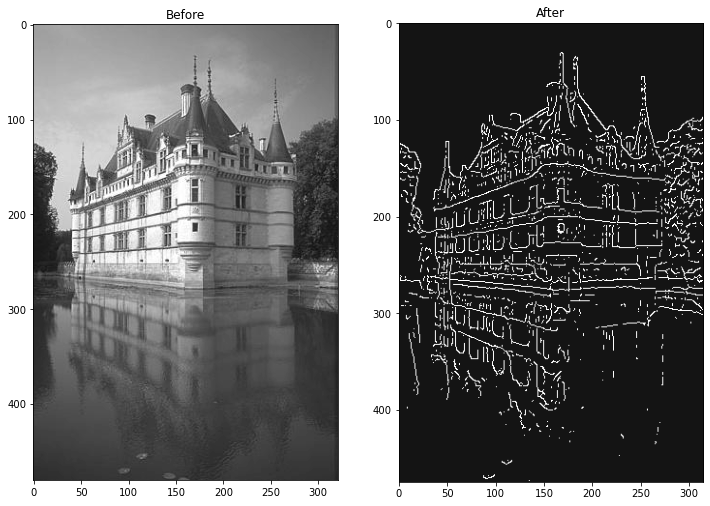

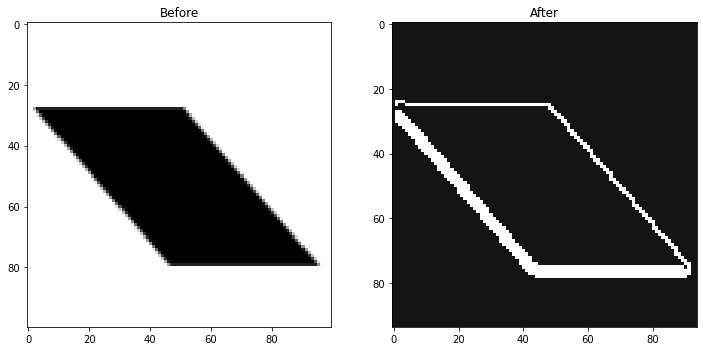

In [12]:
plot_two_images(img2, final_img)
plot_two_images(img2_sample, final_img_sample)